<a href="https://colab.research.google.com/github/jazminfuentesb/challenge1-data-science-latam-jfb/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



¿Cuál tienda vende más?

In [147]:
# Calcular el ingreso total para cada tienda sumando la columna 'Precio'
ingreso_tienda1 = tienda1['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

# Crear un diccionario para almacenar el ingreso total de cada tienda
ingreso_total = {
    "Tienda 1": ingreso_tienda1,
    "Tienda 2": ingreso_tienda2,
    "Tienda 3": ingreso_tienda3,
    "Tienda 4": ingreso_tienda4
}

# Encontrar la tienda con el ingreso más alto
mejor_tienda = max(ingreso_total, key=ingreso_total.get)
mayor_ingreso = ingreso_total[mejor_tienda]

#Encontrar la tienda con el ingreso más bajo
menor_venta_tienda = min(ingreso_total, key=ingreso_total.get)
menor_ingreso = ingreso_total[menor_venta_tienda]

# Mostrar el ingreso total de cada tienda y la tienda con mejor rendimiento
print("Ingreso total por tienda:")
for tienda_nombre, ingreso in ingreso_total.items():
    print(f"{tienda_nombre}: ${ingreso:,.2f}")

print(f"\nLa tienda que más vende es: {mejor_tienda} con un ingreso total de ${mayor_ingreso:,.2f}")
print(f"\nLa tienda que menos vende es: {menor_venta_tienda} con un ingreso total de ${menor_ingreso:,.2f}")

Ingreso total por tienda:
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00

La tienda que más vende es: Tienda 1 con un ingreso total de $1,150,880,400.00

La tienda que menos vende es: Tienda 4 con un ingreso total de $1,038,375,700.00


/tmp/ipython-input-185-1655920236.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ingreso_total_series.index, y=ingreso_total_series.values, palette='viridis')


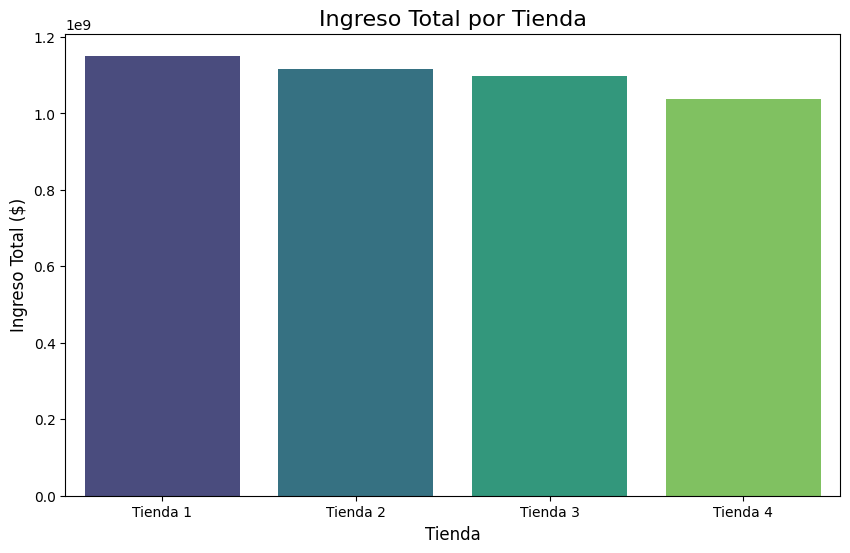

In [185]:
# Convertir el diccionario en una Serie de Pandas para su gráfico
ingreso_total_series = pd.Series(ingreso_total)

# Crear un gráfico de barras para el ingreso total
plt.figure(figsize=(10, 6))
sns.barplot(x=ingreso_total_series.index, y=ingreso_total_series.values, palette='viridis')
plt.title('Ingreso Total por Tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingreso Total ($)', fontsize=12)
#plt.savefig('ingreso_total_por_tienda.png')
plt.savefig('ingreso_total_por_tienda.png', bbox_inches='tight', dpi=300)
plt.show()

# 2. Ventas por categoría

In [149]:
tienda1

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111


In [150]:
#En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [151]:
# Cantidad de productos vendidos por categoría en cada tienda

# Agrupar datos por categoría
productos_por_categoria_tienda1 = tienda1["Categoría del Producto"].value_counts()
productos_por_categoria_tienda2 = tienda2["Categoría del Producto"].value_counts()
productos_por_categoria_tienda3 = tienda3["Categoría del Producto"].value_counts()
productos_por_categoria_tienda4 = tienda4["Categoría del Producto"].value_counts()

In [152]:
# Mostrar los productos por categoría por cada tienda
print(" Productos por categoría de la Tienda 1:")
productos_por_categoria_tienda1

 Productos por categoría de la Tienda 1:


,count
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


In [153]:
print(" Productos por categoría de la Tienda 2:")
productos_por_categoria_tienda2

 Productos por categoría de la Tienda 2:


,count
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


In [154]:
print(" Productos por categoría de la Tienda 3:")
productos_por_categoria_tienda3

 Productos por categoría de la Tienda 3:


,count
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Instrumentos musicales,177
Artículos para el hogar,177


In [155]:
print(" Productos por categoría de la Tienda 4:")
productos_por_categoria_tienda4

 Productos por categoría de la Tienda 4:


,count
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


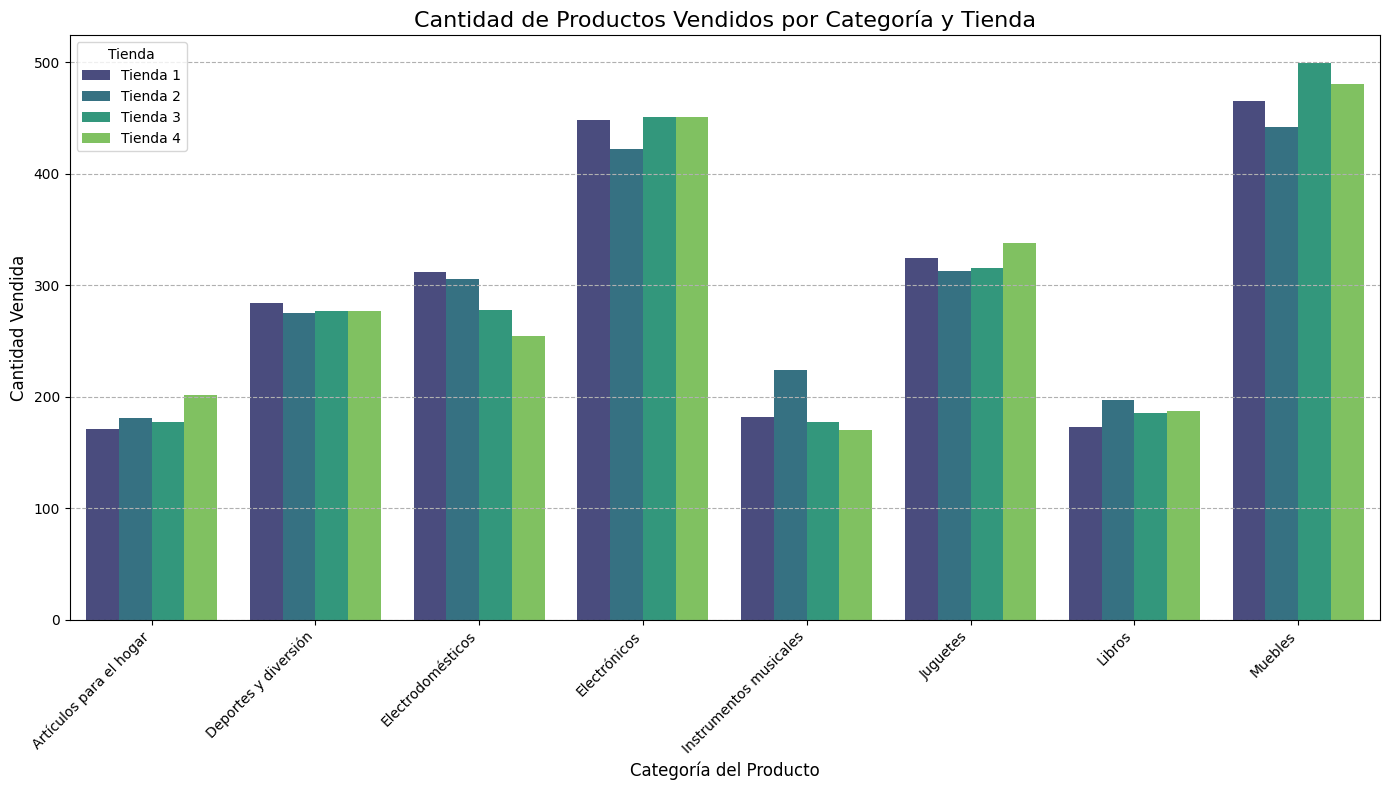

In [156]:
# Concatenar todos los dataframes de las tiendas e identificarlas
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

todas_las_tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4])

# Calcular la cantidad de productos vendidos por categoría y por tienda
conteo_productos_por_categoria_tienda = todas_las_tiendas.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad')

# Crear un gráfico de barras agrupado
plt.figure(figsize=(14, 8))
sns.barplot(data=conteo_productos_por_categoria_tienda, x='Categoría del Producto', y='Cantidad', hue='Tienda', palette='viridis')
plt.title('Cantidad de Productos Vendidos por Categoría y Tienda', fontsize=16)
plt.xlabel('Categoría del Producto', fontsize=12)
plt.ylabel('Cantidad Vendida', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotar las etiquetas para mejor legibilidad
plt.tight_layout() # Ajustar el diseño para evitar que las etiquetas se superpongan
plt.grid(axis='y', linestyle='--')
plt.savefig('cantidad_productos_vendidos_categoria_tienda.png')
plt.show()

# 3. Calificación promedio de la tienda


In [157]:
# En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [158]:
# Calcular la calificación promedio para cada tienda
promedio_tienda1 = tienda1['Calificación'].mean()
promedio_tienda2 = tienda2['Calificación'].mean()
promedio_tienda3 = tienda3['Calificación'].mean()
promedio_tienda4 = tienda4['Calificación'].mean()

# Crear un diccionario para almacenar la calificación promedio de cada tienda
calificacion_promedio = {
    "Tienda 1": promedio_tienda1,
    "Tienda 2": promedio_tienda2,
    "Tienda 3": promedio_tienda3,
    "Tienda 4": promedio_tienda4
}

# Mostrar la calificación promedio de cada tienda
print("Calificación promedio por tienda:")
for tienda_nombre, calificacion in calificacion_promedio.items():
    print(f"{tienda_nombre}: {calificacion:.2f}")

# Encontrar la tienda con la mayor calificación
mayor_calificacion_tienda = max(calificacion_promedio, key=calificacion_promedio.get)
mayor_promedio = calificacion_promedio[mayor_calificacion_tienda]
print(f"\nLa tienda con la mayor calificación es {mayor_calificacion_tienda} con una calificación de {round(mayor_promedio,2)}")

# Encontrar la tienda con la menor calificación
menor_calificacion_tienda = min(calificacion_promedio, key=calificacion_promedio.get)
menor_promedio = calificacion_promedio[menor_calificacion_tienda]
print(f"\nLa tienda con la menor calificación es {menor_calificacion_tienda} con una calificación de {round(menor_promedio,2)}")

Calificación promedio por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00

La tienda con la mayor calificación es Tienda 3 con una calificación de 4.05

La tienda con la menor calificación es Tienda 1 con una calificación de 3.98


/tmp/ipython-input-171-3413449874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=calificacion_promedio_series.index, y=calificacion_promedio_series.values, palette='viridis')


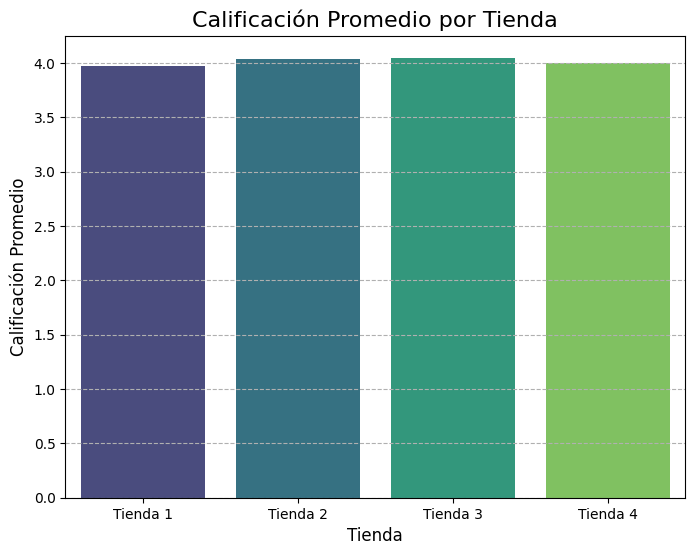

In [171]:
# Convertir el diccionario en una Serie de Pandas para el gráfico
calificacion_promedio_series = pd.Series(calificacion_promedio)

# Crear gráfico de barras con el promedio de la calificación
plt.figure(figsize=(8, 6))
sns.barplot(x=calificacion_promedio_series.index, y=calificacion_promedio_series.values, palette='viridis')
plt.title('Calificación Promedio por Tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.savefig('calificacion_promedio_tienda.png')
plt.show()

# 4. Productos más y menos vendidos

In [160]:
# En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [161]:
# Correctly populate the tiendas dictionary with the DataFrame variables
tiendas = {
    'Tienda 1': tienda1,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

def analizar_productos_tienda(nombre_tienda, tienda, top_n=5):
    """Analiza los productos más y menos vendidos de una tienda"""

    productos_counts = tienda["Producto"].value_counts()

    print(f"\n{'='*50}")
    print(f"ANÁLISIS DE {nombre_tienda.upper()}")
    print(f"{'='*50}")

    print(f"\n TOP {top_n} PRODUCTOS MÁS VENDIDOS:")
    mas_vendidos = productos_counts.head(top_n)
    if not mas_vendidos.empty:
        for i, (producto, cantidad) in enumerate(mas_vendidos.items(), 1):
            print(f"{i}. {producto}: {cantidad} ventas")
    else:
        print("No hay datos de productos disponibles.")


    print(f"\n TOP {top_n} PRODUCTOS MENOS VENDIDOS:")
    menos_vendidos = productos_counts.tail(top_n)
    if not menos_vendidos.empty:
        for i, (producto, cantidad) in enumerate(menos_vendidos.items(), 1):
            print(f"{i}. {producto}: {cantidad} ventas")
    else:
        print("No hay datos de productos disponibles.")

    return productos_counts

# Ejecutar análisis para todas las tiendas
resultados = {}
for nombre, df in tiendas.items():
    resultados[nombre] = analizar_productos_tienda(nombre, df, top_n=5)

print(f"\n{'='*60}")
print("COMPARACIÓN Y ANÁLISIS GLOBAL DE PRODUCTOS")
print(f"{'='*60}")

# Comparar productos más vendidos entre tiendas
print("\nPRODUCTO MÁS VENDIDO POR TIENDA:")
for tienda_nombre, productos in resultados.items():
    if productos is not None and not productos.empty:
        top_producto = productos.index[0]
        cantidad = productos.iloc[0]
        print(f"{tienda_nombre}: {top_producto} ({cantidad} ventas)")
    elif productos is not None and productos.empty:
         print(f"{tienda_nombre}: No hay datos de productos disponibles.")


# Encontrar el producto más popular globalmente
print("\n RANKING GLOBAL DE PRODUCTOS MÁS VENDIDOS:")
todos_productos = {}
for tienda_nombre, productos in resultados.items():
    if productos is not None:
        for producto, cantidad in productos.items():
            if producto in todos_productos:
                todos_productos[producto] += cantidad
            else:
                todos_productos[producto] = cantidad

# Ordenar y mostrar top global
if todos_productos:
    import pandas as pd
    ranking_global = pd.Series(todos_productos).sort_values(ascending=False)
    for i, (producto, total) in enumerate(ranking_global.head(10).items(), 1):
        print(f"{i}. {producto}: {total} ventas totales")
else:
    print("No hay datos de productos disponibles para el ranking global.")


# Mostrar en qué tiendas se vende cada producto top global
if todos_productos:
    print(f"\n DISTRIBUCIÓN DE LOS TOP 5 PRODUCTOS GLOBALES POR TIENDA:")
    for producto in ranking_global.head(5).index:
        print(f"\n{producto}:")
        for tienda_nombre, productos in resultados.items():
            if productos is not None and producto in productos:
                print(f"  - {tienda_nombre}: {productos[producto]} ventas")
            elif productos is not None:
                print(f"  - {tienda_nombre}: 0 ventas")
else:
    print("No hay datos de productos disponibles para mostrar la distribución por tienda.")


ANÁLISIS DE TIENDA 1

 TOP 5 PRODUCTOS MÁS VENDIDOS:
1. Microondas: 60 ventas
2. TV LED UHD 4K: 60 ventas
3. Armario: 60 ventas
4. Secadora de ropa: 58 ventas
5. Mesa de noche: 56 ventas

 TOP 5 PRODUCTOS MENOS VENDIDOS:
1. Ciencia de datos con Python: 39 ventas
2. Pandereta: 36 ventas
3. Olla de presión: 35 ventas
4. Auriculares con micrófono: 33 ventas
5. Celular ABXY: 33 ventas

ANÁLISIS DE TIENDA 2

 TOP 5 PRODUCTOS MÁS VENDIDOS:
1. Iniciando en programación: 65 ventas
2. Microondas: 62 ventas
3. Batería: 61 ventas
4. Guitarra acústica: 58 ventas
5. Pandereta: 58 ventas

 TOP 5 PRODUCTOS MENOS VENDIDOS:
1. Auriculares: 37 ventas
2. Sillón: 35 ventas
3. Mesa de comedor: 34 ventas
4. Impresora: 34 ventas
5. Juego de mesa: 32 ventas

ANÁLISIS DE TIENDA 3

 TOP 5 PRODUCTOS MÁS VENDIDOS:
1. Kit de bancas: 57 ventas
2. Mesa de comedor: 56 ventas
3. Cama king: 56 ventas
4. Set de ollas: 55 ventas
5. Mesa de noche: 55 ventas

 TOP 5 PRODUCTOS MENOS VENDIDOS:
1. Guitarra eléctrica: 38 vent

# 5. Envío promedio por tienda

In [162]:
# En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [163]:
tienda1

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359,Tienda 1
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175,Tienda 1
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250,Tienda 1
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111,Tienda 1


In [164]:
# Agrupar por el valor del costo del envío
costo_envio_tienda1 = tienda1["Costo de envío"].mean()
costo_envio_tienda2 = tienda2["Costo de envío"].mean()
costo_envio_tienda3 = tienda3["Costo de envío"].mean()
costo_envio_tienda4 = tienda4["Costo de envío"].mean()

# Crear un diccionario para almacenar el promedio del costo del envío por tienda
costo_envio_promedio = {
    "Tienda 1": costo_envio_tienda1,
    "Tienda 2": costo_envio_tienda2,
    "Tienda 3": costo_envio_tienda3,
    "Tienda 4": costo_envio_tienda4
}

# Mostrar el promedio de cada tienda
print("Costo de envío promedio por tienda:")
for tienda_nombre, promedio in costo_envio_promedio.items():
    print(f"{tienda_nombre}: {promedio:.2f}")

# Encontrar la tienda con el mayor promedio de costo de envío
mayor_costo_tienda = max(costo_envio_promedio, key=costo_envio_promedio.get)
mayor_promedio_tienda = costo_envio_promedio[mayor_costo_tienda]
print(f"\nLa tienda con el menor costo de envío es la {mayor_costo_tienda} con un promedio de {round(mayor_promedio_tienda,2)}")

# Encontrar la tienda con el menor promedio del costo de envío
menor_costo_tienda = min(costo_envio_promedio, key=costo_envio_promedio.get)
menor_promedio_tienda = costo_envio_promedio[menor_costo_tienda]
print(f"\nLa tienda con el menor costo de envío es la {menor_costo_tienda} con un promedio de {round(menor_promedio_tienda,2)}")

Costo de envío promedio por tienda:
Tienda 1: 26018.61
Tienda 2: 25216.24
Tienda 3: 24805.68
Tienda 4: 23459.46

La tienda con el menor costo de envío es la Tienda 1 con un promedio de 26018.61

La tienda con el menor costo de envío es la Tienda 4 con un promedio de 23459.46


/tmp/ipython-input-165-2005517343.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=costo_envio_promedio_series.index, y=costo_envio_promedio_series.values, palette='viridis')


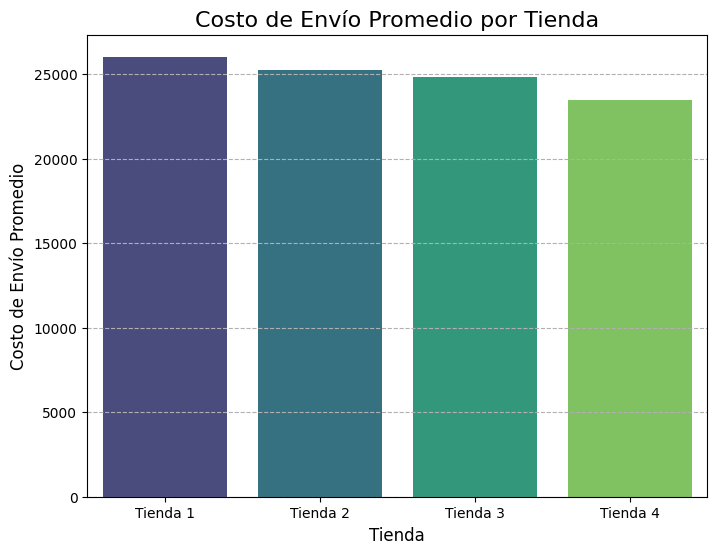

In [165]:
# Convertir el diccionario en una Serie de Pandas para el gráfico
costo_envio_promedio_series = pd.Series(costo_envio_promedio)

# Crear gráfico de barras con el promedio del costo de envío
plt.figure(figsize=(8, 6))
sns.barplot(x=costo_envio_promedio_series.index, y=costo_envio_promedio_series.values, palette='viridis')
plt.title('Costo de Envío Promedio por Tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo de Envío Promedio', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.savefig('costo_envio_por_tienda.png')
plt.show()

# Informe final

Con base en los análisis realizados y los gráficos generados, es momento de sintetizar sus hallazgos en un informe final. Dentro de tu Colab, deberás redactar un texto explicando a qué tienda debe vender el Sr. Juan, teniendo en cuenta todos los factores analizados, como:

Los ingresos totales de las tiendas.

Las categorías de productos más y menos vendidas.

Las calificaciones promedio de los clientes por tienda.

Los productos más y menos vendidos.

El coste de envío promedio para cada tienda.

En su informe, incluya la justificación de su decisión, respaldada por el análisis y las visualizaciones que generó. Explicar, de forma clara y objetiva, las razones por las que una tienda destaca (o no) en relación a las demás, considerando las fortalezas y debilidades de cada una.

Su informe debe estar bien estructurado, con una introducción que explique el propósito del análisis, un desarrollo con la presentación de datos y gráficos, y una conclusión recomendando la tienda que se debe vender y justificando la elección.



# Informe Final: Recomendación de Tienda para el Sr. Juan

## Introducción

El presente informe tiene como objetivo analizar el rendimiento de las cuatro tiendas proporcionadas para determinar cuál de ellas sería la opción más recomendable para que el Sr. Juan venda, dado que ya no le conviene mantenerla por su rentabilidad o rendimiento. Para ello, se han evaluado diversos factores clave como los ingresos totales, las ventas por categoría de producto, la satisfacción del cliente (a través de las calificaciones promedio), los productos más y menos vendidos, y el costo de envío promedio.

## Análisis de Resultados

Se realizaron los siguientes análisis:

1. **Análisis de Facturación:** Se calculó el ingreso total para cada tienda. La Tienda 1 generó el mayor ingreso total, seguida por la Tienda 2, Tienda 3 y, finalmente, la Tienda 4 con el menor ingreso. El primer gráfico de barras muestra esta comparación de ingresos.

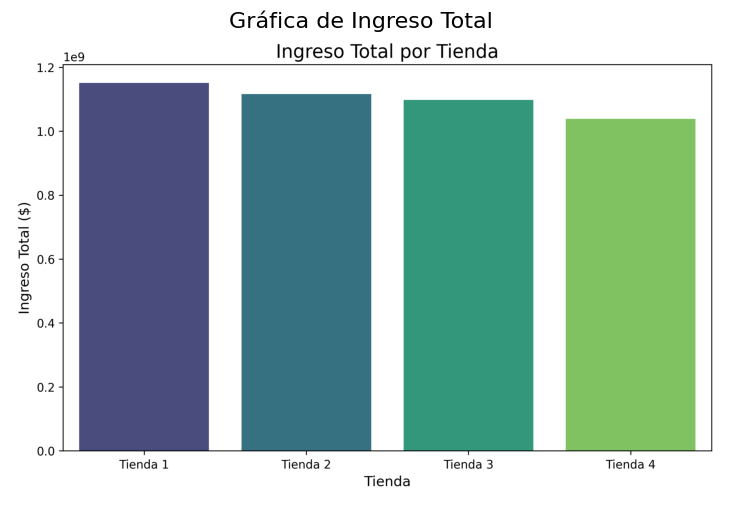

In [197]:
ruta_imagen = 'ingreso_total_por_tienda.png'
img = mpimg.imread(ruta_imagen)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title('Gráfica de Ingreso Total ', fontsize=16)
plt.show()


2. **Ventas por Categoría:** Se analizó la cantidad de productos vendidos por cada categoría en cada tienda. Se observa que las categorías de Muebles y Electrónicos son consistentemente las más vendidas en todas las tiendas. El segundo gráfico, que corresponde a un gráfico de barras agrupadas, ilustra la distribución de ventas por categoría a través de las tiendas, confirmando la popularidad de estas categorías.

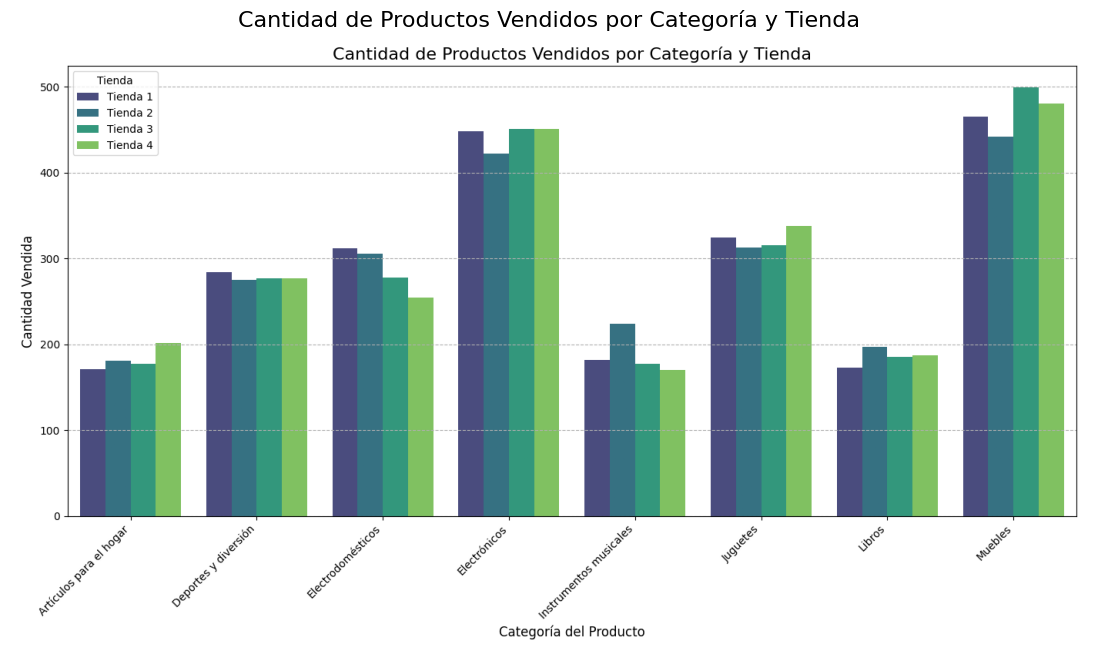

In [200]:
ruta_imagen = 'cantidad_productos_vendidos_categoria_tienda.png'
img = mpimg.imread(ruta_imagen)
plt.figure(figsize=(14, 8))
plt.imshow(img)
plt.axis('off')
plt.title('Cantidad de Productos Vendidos por Categoría y Tienda', fontsize=16)
plt.show()

3. **Calificación Promedio de la Tienda:** Se calculó la calificación promedio de los clientes para cada tienda. La Tienda 3 obtuvo la calificación promedio más alta, indicando una mayor satisfacción general del cliente, seguida de cerca por la Tienda 2, Tienda 4 y Tienda 1.

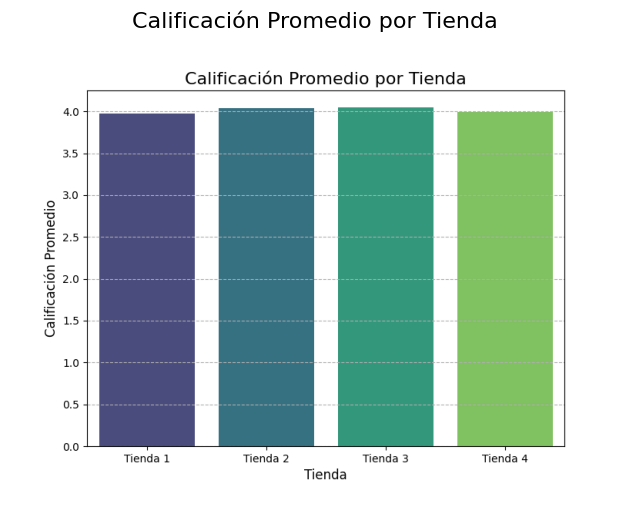

In [203]:
ruta_imagen = 'calificacion_promedio_tienda.png'
img = mpimg.imread(ruta_imagen)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title('Calificación Promedio por Tienda ', fontsize=16)
plt.show()

4. **Productos Más y Menos Vendidos:** Se identificaron los productos individuales más y menos vendidos en general. Esto brinda una idea de la demanda de productos específicos en el mercado de estas tiendas.

5. **Envío Promedio por Tienda:** Se calculó el costo de envío promedio para cada tienda. La Tienda 4 tuvo el costo de envío promedio más bajo, mientras que la Tienda 1 tuvo el más alto. Se visualizaron estos costos en el tercer gráfico de barras.

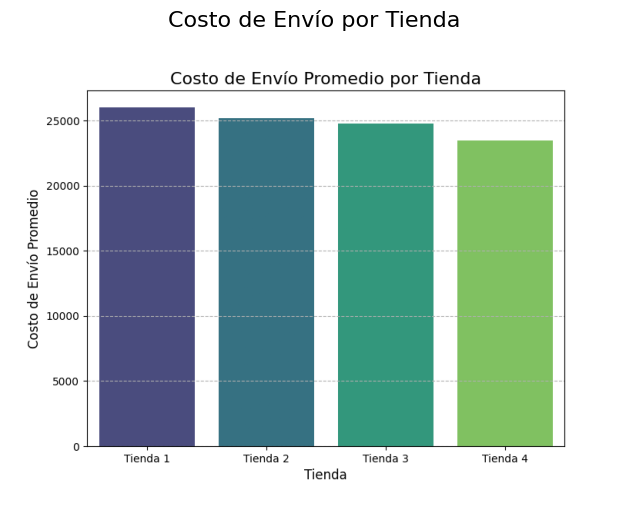

In [204]:
ruta_imagen = 'costo_envio_por_tienda.png'
img = mpimg.imread(ruta_imagen)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title('Costo de Envío por Tienda ', fontsize=16)
plt.show()

## Conclusión y Recomendación

Considerando los factores analizados y los resultados obtenidos de nuestros gráficos, la recomendación para el Sr. Juan es vender la Tienda 4, ya que es la que presenta el menor rendimiento y, por lo tanto, la que menos le conviene seguir manteniendo.

### Justificación para Vender la Tienda 4:

*  **Menor Ingreso Total:** La Tienda 4 registró consistentemente el menor ingreso
total de las cuatro tiendas. Este es el indicador más directo de su baja rentabilidad y menor generación de valor.

*  **Menor Volumen de Ventas General:** Más allá del ingreso, la Tienda 4 también mostró, en general, un menor volumen de productos vendidos a través de las categorías en comparación con las otras tiendas, lo que indica una actividad comercial más débil.

*  **A pesar del Costo de Envío Bajo:** Aunque la Tienda 4 tuvo el costo de envío promedio más bajo, esta ventaja en la reducción de gastos no es suficiente para compensar su bajo desempeño en ventas y facturación. Un costo de envío eficiente pierde relevancia si el volumen de negocio que lo acompaña es mínimo.

*  **Calificación de Cliente:** Si bien su calificación promedio es intermedia, no es lo suficientemente alta como para compensar su debilidad en ingresos y volumen.

En resumen, basándonos en el menor ingreso total y el bajo volumen general de productos vendidos, la Tienda 4 se perfila claramente como la tienda con el peor rendimiento. Mantener esta tienda probablemente representa una carga o una oportunidad de mejora significativamente menor en comparación con las otras. Por lo tanto, si el Sr. Juan debe decidir de cuál tienda prescindir por no ser rentable o conveniente, la Tienda 4 es la candidata más lógica para ser vendida.